* IMPORT LIBRARIES
* LOAD DATA
* PERFORM EXPLORATORY DATA ANALYSIS
* PERFORM DATA WRANGLING
* SEPERATE VARIABLES INTO TEST AND TRAIN
* LOGICTED REGRESSION
* NAVIES BAYES
* KNN ALGORITHMS
* PREDICTED RESULT

In [1]:
# IMPORT LIBRARIES

import numpy as np 
import pandas as pd
import datetime
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings("ignore")

In [2]:
# LOAD DATASET
loan = pd.read_csv("loan_data_set.csv")

In [3]:
loan.head()  #DISPLAY TOP 5 ROWS

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Getting description of Dataset
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# Display no. of rows and columns
loan.shape

(614, 13)

In [6]:
# Display information about dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
pd.crosstab(loan['Credit_History'],loan['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<AxesSubplot:>

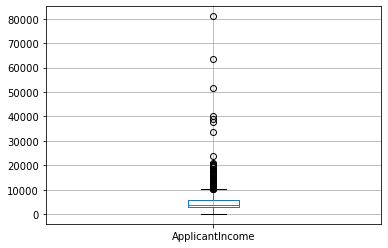

In [8]:
# Data Visualization of applicantincome
loan.boxplot(column='ApplicantIncome')

<AxesSubplot:>

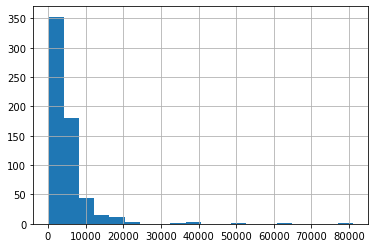

In [9]:
# Show histogram
loan['ApplicantIncome'].hist(bins=20)

<AxesSubplot:>

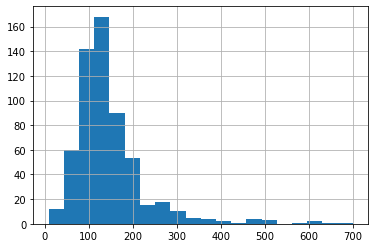

In [10]:
# Show histogram of loadamount
loan['LoanAmount'].hist(bins=20)

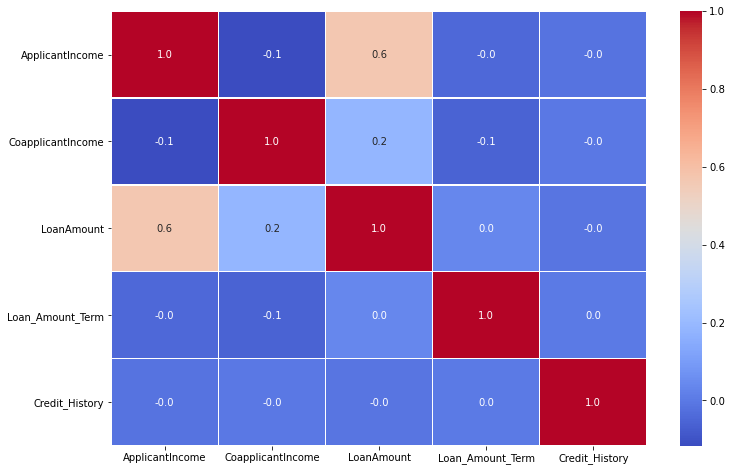

In [11]:
# show data as heatmap
plt.figure(figsize=(12,8))
sns.heatmap(loan.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

## Data Wrangling

In [12]:
loan = loan.drop('Loan_ID',axis=1)

In [13]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(loan)

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Education,0,0.000000
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000


In [14]:
loan.isnull().values.any()

True

In [15]:
loan.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
loan['Gender'].fillna(loan['Gender'].mode()[0],inplace=True)

In [17]:
loan['Married'].fillna(loan['Married'].mode()[0],inplace=True)

In [18]:
loan['Dependents'].fillna(loan['Dependents'].mode()[0],inplace=True)

In [19]:
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0],inplace=True)

In [22]:
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0],inplace=True)

In [23]:
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0],inplace=True)

In [24]:
loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### DATA VISUALIZATION

In [25]:
loan['TotalIncome']=loan['ApplicantIncome']+loan['CoapplicantIncome']
loan['TotalIncome_log']=np.log(loan['TotalIncome'])

<AxesSubplot:>

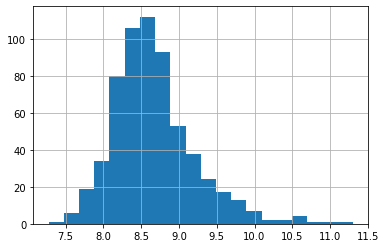

In [26]:
loan['TotalIncome_log'].hist(bins=20)

The percentage of Y class : 0.69
The percentage of N class : 0.31


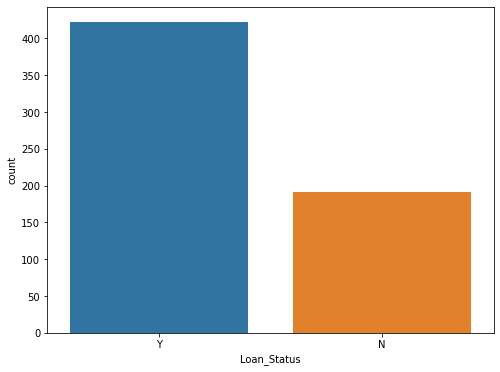

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(loan['Loan_Status']);

print('The percentage of Y class : %.2f' % (loan['Loan_Status'].value_counts()[0] / len(loan)))
print('The percentage of N class : %.2f' % (loan['Loan_Status'].value_counts()[1] / len(loan)))

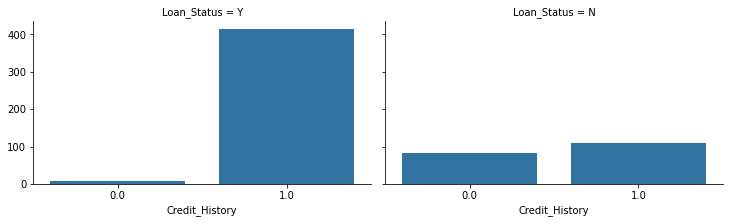

In [28]:
grid = sns.FacetGrid(loan,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History');

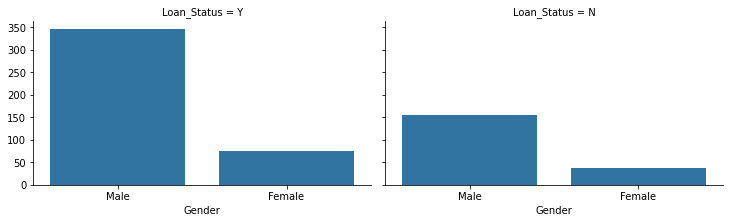

In [29]:
grid = sns.FacetGrid(loan,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender');

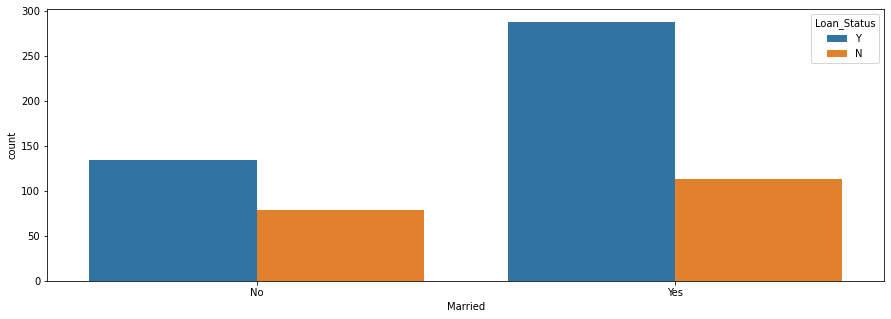

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(x='Married', hue='Loan_Status', data=loan);

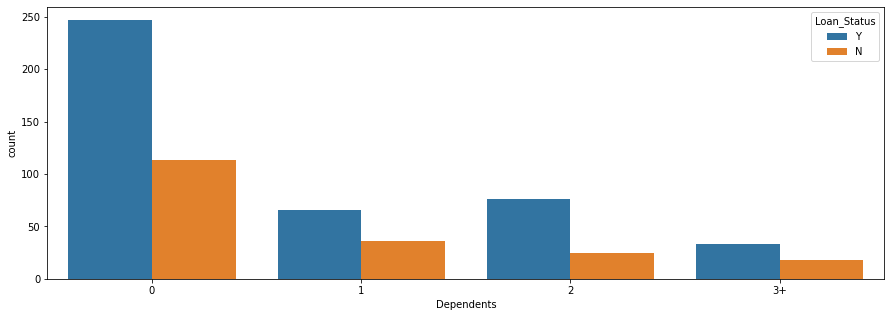

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=loan);

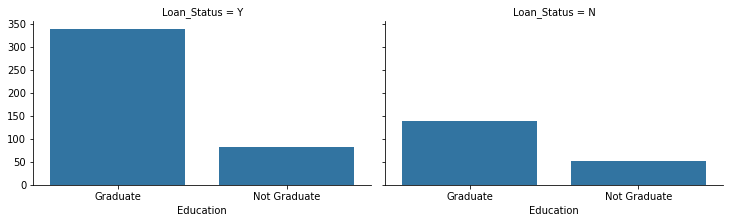

In [32]:
grid = sns.FacetGrid(loan,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education');

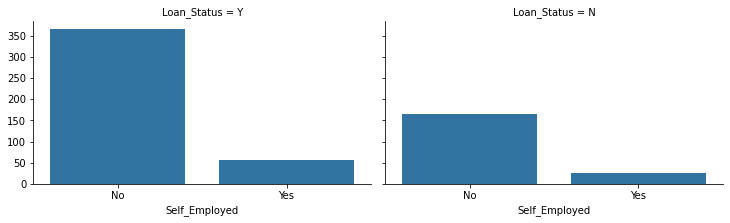

In [33]:
grid = sns.FacetGrid(loan,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Self_Employed');

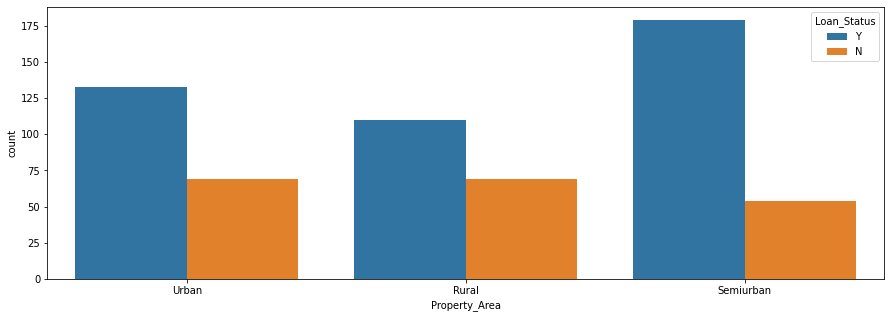

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=loan);

In [35]:
loan.groupby('Loan_Status').median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,TotalIncome_log
Loan_Status,,,,,,,
N,3833.5,268.0,133.5,360.0,1.0,5289.5,8.573478
Y,3812.5,1239.5,128.0,360.0,1.0,5439.0,8.601348


In [36]:
# for Categorical Data
cat_col = loan.select_dtypes(include=['object']).columns
loan_cat = loan[cat_col]
loan_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [37]:
# For Numerical Data
num_col = loan.select_dtypes(exclude=['object']).columns
loan_num = loan[num_col]
loan_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,TotalIncome_log
0,5849,0.0,146.412162,360.0,1.0,5849.0,8.674026
1,4583,1508.0,128.000000,360.0,1.0,6091.0,8.714568
2,3000,0.0,66.000000,360.0,1.0,3000.0,8.006368
3,2583,2358.0,120.000000,360.0,1.0,4941.0,8.505323
4,6000,0.0,141.000000,360.0,1.0,6000.0,8.699515
...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,2900.0,7.972466
610,4106,0.0,40.000000,180.0,1.0,4106.0,8.320205
611,8072,240.0,253.000000,360.0,1.0,8312.0,9.025456
612,7583,0.0,187.000000,360.0,1.0,7583.0,8.933664


In [38]:
# Replacing variables with values
loan['Loan_Status'].replace(to_replace='Y', value=1, inplace=True)
loan['Loan_Status'].replace(to_replace='N',  value=0, inplace=True)

In [40]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1,5849.0,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,6091.0,8.714568
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,3000.0,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1,4941.0,8.505323
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1,6000.0,8.699515


### Dublicates Columns

In [41]:
dummies = pd.get_dummies(loan)
dummies.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,TotalIncome_log,Gender_Female,Gender_Male,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,5849.0,8.674026,0,1,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,6091.0,8.714568,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,3000.0,8.006368,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,4941.0,8.505323,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,6000.0,8.699515,0,1,...,0,0,0,1,0,1,0,0,0,1


<AxesSubplot:>

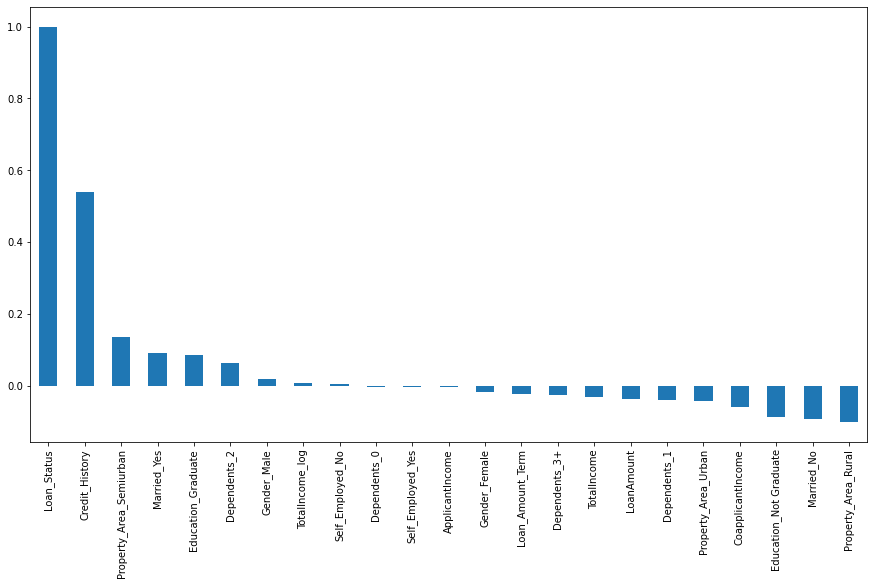

In [42]:
# plot the duplicates columns
plt.figure(figsize=(15,8))
dummies.corr()['Loan_Status'].sort_values(ascending = False).plot(kind='bar')

In [43]:
# Making x,y Variables
y = dummies['Loan_Status'].values
X = dummies.drop(columns = ['Loan_Status'])

### Split the Dataset into Test and Train

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [45]:
print("xtrain shape : ", X_train.shape) 
print("xtest shape  : ", X_test.shape) 
print("ytrain shape : ", y_train.shape) 
print("ytest shape  : ", y_test.shape) 

xtrain shape :  (491, 22)
xtest shape  :  (123, 22)
ytrain shape :  (491,)
ytest shape  :  (123,)


## LOGICTIC REGRESSION

In [46]:
model = LogisticRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
probabilities = model.predict_proba(X_test)

In [47]:
print ("\n Classification report : \n",classification_report(y_test,predictions))
print ("Accuracy Score   : ",accuracy_score(y_test,predictions))
model_roc_auc = roc_auc_score(y_test,predictions) 
print ("Area under curve : ",model_roc_auc)


 Classification report : 
               precision    recall  f1-score   support

           0       0.76      0.48      0.59        33
           1       0.83      0.94      0.89        90

    accuracy                           0.82       123
   macro avg       0.80      0.71      0.74       123
weighted avg       0.81      0.82      0.81       123

Accuracy Score   :  0.8211382113821138
Area under curve :  0.7146464646464646


In [48]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
df.head()

,Actual,Predicted
0,1,1
1,0,1
2,1,1
3,0,1
4,1,1


Area under curve :  0.7146464646464646


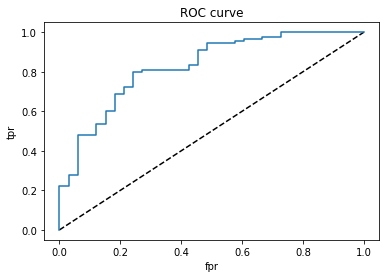

In [49]:
model_roc_auc = roc_auc_score(y_test,predictions) 
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
print ("Area under curve : ",model_roc_auc)
plt.show()

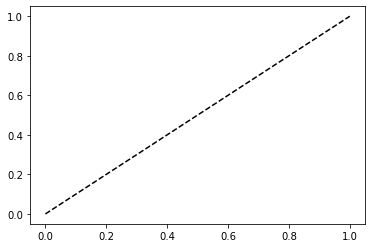

In [50]:
plt.plot([0,1],[0,1],'k--')

In [51]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)

## Naïve Bayes

In [52]:
NBClassifier=GaussianNB()
NBClassifier.fit(X_train,y_train)

GaussianNB()

In [59]:
y_pred=NBClassifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [62]:
def classification_report(model):
    prediction_test = model.predict(X_test)
    # Print the prediction accuracy
    accuracy = metrics.accuracy_score(y_test, prediction_test)
    confusion_matrix = metrics.confusion_matrix(y_test, prediction_test)
    classification = metrics.classification_report(y_test, prediction_test)

    print('============================== Model Evaluation ==============================')
    print('Classifier :',model)
    print("\n Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 

In [63]:
classification_report(NBClassifier)

============================== Model Evaluation ==============================
Classifier : GaussianNB()

 Model Accuracy:
 0.2682926829268293

Confusion matrix:
 [[33  0]
 [90  0]]

Classification report:
               precision    recall  f1-score   support

           0       0.27      1.00      0.42        33
           1       0.00      0.00      0.00        90

    accuracy                           0.27       123
   macro avg       0.13      0.50      0.21       123
weighted avg       0.07      0.27      0.11       123



In [64]:
class_names=[1,0]
def plot_conf_matrix(y_test, prediction_test, class_names):
    cnf_matrix = metrics.confusion_matrix(y_test, prediction_test)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

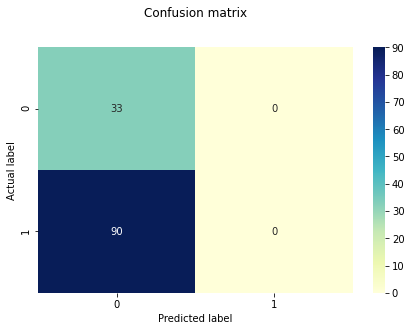

In [67]:
plot_conf_matrix(y_test, y_pred, class_names)

In [68]:
def plot_roc(model,X_test,y_test):
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label='NB')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('Naive Bayes ROC curve')
    plt.show()

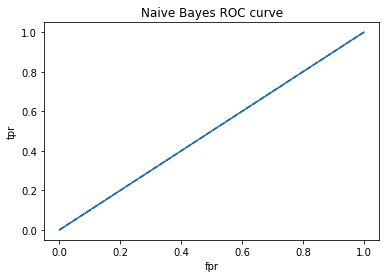

In [70]:
plot_roc(NBClassifier,X_test,y_test)

In [54]:
print("The accuracy is:",metrics.accuracy_score(y_pred,y_test))

The accuracy is: 0.2682926829268293


## KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors=3)
#Train the model using the training sets 
knn.fit(X_train, y_train)

#Predict the response for test dataset
predictions  = knn.predict(X_test)
probabilities = model.predict_proba(X_test)

In [56]:
print ("\n Classification report : \n",classification_report(y_test,predictions))
print ("Accuracy Score   : ",accuracy_score(y_test,predictions))
model_roc_auc = roc_auc_score(y_test,predictions) 
print ("Area under curve : ",model_roc_auc)


 Classification report : 
               precision    recall  f1-score   support

           0       0.27      0.36      0.31        33
           1       0.73      0.63      0.68        90

    accuracy                           0.56       123
   macro avg       0.50      0.50      0.49       123
weighted avg       0.61      0.56      0.58       123

Accuracy Score   :  0.5609756097560976
Area under curve :  0.49848484848484853


In [57]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
df.head()

,Actual,Predicted
0,1,1
1,0,1
2,1,1
3,0,1
4,1,1


Area under curve :  0.49848484848484853


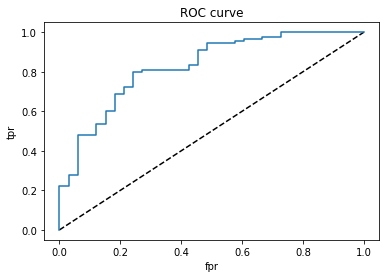

In [58]:
model_roc_auc = roc_auc_score(y_test,predictions) 
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
print ("Area under curve : ",model_roc_auc)
plt.show()